## Computational and Statistical Methods for Research Assignment
#### CID: 01413258   
#### Date: 16 December 2022



In [455]:
#Library import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats


In [456]:
#Importing relevent dataset
data = pd.read_excel('Dataset 13784.xlsx')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,* How do magnese supplements impact on systoli...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Group,BP before,BP after,NaN,NaN,NaN,NaN
2,NaN,1,110,102,NaN,NaN,Group 1,Placebo
3,NaN,1,113,116,NaN,NaN,Group 2,Treatment
4,NaN,1,126,107,NaN,NaN,NaN,NaN


In [457]:
# Rename the columns to better represent the data they contain from the 3rd row
data.rename(columns = {'Unnamed: 1': data.loc[1,'Unnamed: 1'], 'Unnamed: 2':data.loc[1,'Unnamed: 2'] , 'Unnamed: 3':data.loc[1,'Unnamed: 3']}, inplace = True)
# Rename the 1st and 2nd groups to their corresponding names from the provided legend in the column 'Unnamed: 7'
data['Group'].replace({1:data.loc[2,'Unnamed: 7'],2: data.loc[3,'Unnamed: 7']}, inplace = True)
# Delete the first row of the provided data
data = data.drop(labels=[0,1], axis=0)
# Remove all columns where there are less than 3 non-Nan values. This enables only the 3 named columns to remain.
data= data.dropna(axis =1, thresh=3)
# Remove the Nan row seperating Group 1 (placebo) from Group 2 (treatment)
data= data.dropna()
print(data)

        Group BP before BP after
2     Placebo       110      102
3     Placebo       113      116
4     Placebo       126      107
5     Placebo       132      114
6     Placebo       115      117
7     Placebo       114      118
8     Placebo       110      108
9     Placebo       115      104
10    Placebo       139      127
11    Placebo       105      106
13  Treatment       120      124
14  Treatment       106       97
15  Treatment       109      113
16  Treatment        99      105
17  Treatment        95       95
18  Treatment       111      119
19  Treatment       116      114
20  Treatment       111      112
21  Treatment       107      121
22  Treatment       114      118
23  Treatment       127      133


## Section 1: Data Visualization (15 Marks)

In this section students are expected to produce a figure (or figures) that fully represents the data they are given. This plot (or plots) should clearly show the shape of the data and the relationship between the independent and dependent data. In addition to the figure/s, students must write a  paragraph describing the  data and  explaining  their  choice  of  display  figures.  This  paragraph should clearly highlight any interesting properties of the data such as shape, trend, etc. (10marks for figures, 5marks for explanatory paragraph)

### Analysis of the Provided Data: Pre-Figures

The dataset provided aims to investigate how maganese supplements impact systolic blood pressure. This is tested by having two separate groups, a placebo group consisting of 10 people, and a treatment group consisting of 11 people. For each group, an initial systolic blood pressure is taken before any intervention followed by a systolic blood pressure after the requisite intervention. Subsequently, the dependent variable in this study is the systolic blood pressure taken before and after the intervention and the independent variable is the intervention each group is exposed to, which is either a placebo or a treatment.

Since the dataset provided has each data point being uniquely matched (ie: BP before and after for each data point would have come from the same person), the data for the BP before and BP after within each group comes from paired samples. However, since the control and experimental group are derived from different people, the difference between the blood pressure before and after is independent to enable a statistical comparison between the two groups. This choice to take the difference between the groups enables the variability between groups to also be present in the analysis rather than just using the BP after each intervention as the dependent variable. This analysis also enables the treatment effect to be compared to the control and determine whether the difference seen in the treatment is truly because of the treatment or some other underlying factor.

From literature, maganese supplements, assumed to be a form of magnesium, are shown to decrease systolic blood pressure and thus, it is expected to see a decrease in BP values after the treatment has been provided. 

### Figure Choice 

Since the data provided has numerical dependent variables (Blood Pressure readings) and categorical independent variables (Treatment and Placebo), the best plots to utilise for the spread, trend and overall shape of the data are the histogram and the box and whisker plots.

A histogram is a good choice for exploratory data analysis for either numeric or categorical variables with continuous dependent variables as it enables a graphical representation of the distribution of the data thus providing a visual aid to observe any skew in the data, whether there are any outliers and whether there are multiple peaks. However, it can sometimes be hard to compare across different dataset values since no explicit statistics have been performed - the data has merely just been plotted in bins. 

A box and whisker plot is another way of determining the distribution of data, through taking descriptive statistics to determine a 5-number summary consisting of measures of spread- the 25th percentile and 75th percentile, a measure of central tendency - the median and the minimum and maximum values which together with the percentiles are useful for identifying any outliers. A box and whisker plot makes it easy to observe where the bulk of data is congregated and allows easier comparison across groups by being able to compare across the same 5-number summary statistics. However, its downside is that it eliminates the shape and peak information which the histogram provides. 

Subsequently, using a box and whisker plot in addition to a histogram enables an easier quantitative comparison between groups while also enabling the overall group shape to still be observed. Both plots will be provided for the original data groups of BP before and after the placebo and treatment. However, only a histogram analysis will be provided for the comparison across the placebo and treatment BP differences to avoid repetition of the analysis for data deriving from the fully analysed raw data. 

Text(0.5, 1.0, 'Figure 1: Box and Whisker Plot for Systolic Blood Pressure Before and After Intervention of Placebo or Treatment')

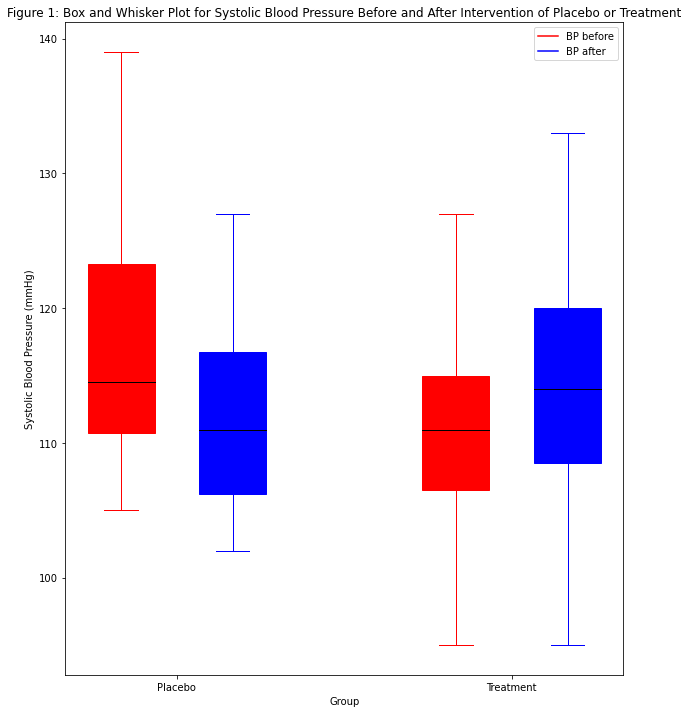

In [476]:
# Box and Whisker Plot 

# Setting up the figure varibales 
plt.figure(figsize=(10,12))
color_val=['red','blue']
group = ['Placebo', 'Treatment']
names= ['BP before', 'BP after']
pos = [1,2,4,5]

# Plotting the 4 different box and whisker graphs 
x,y =0,0
for i in range(len(pos)):
    plt.boxplot(data[data['Group'] == group[y]][names[x]],  positions = [pos[i]], widths = 0.6,patch_artist=True,
             boxprops=dict(facecolor=color_val[x], color=color_val[x]),
            capprops=dict(color=color_val[x]),
            whiskerprops=dict(color=color_val[x]),
            flierprops=dict(color=color_val[x], markeredgecolor=color_val[x]),
            medianprops=dict(color='black'))
    x = x+1
    if x ==2:
        x=0
        y=1

# Labelling the plots 
plt.xticks([1.5, 4.5],['Placebo', 'Treatment'] )
plt.plot([], c='red', label='BP before')
plt.plot([], c='blue', label='BP after')
plt.legend()
plt.xlabel('Group')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Figure 1: Box and Whisker Plot for Systolic Blood Pressure Before and After Intervention of Placebo or Treatment')


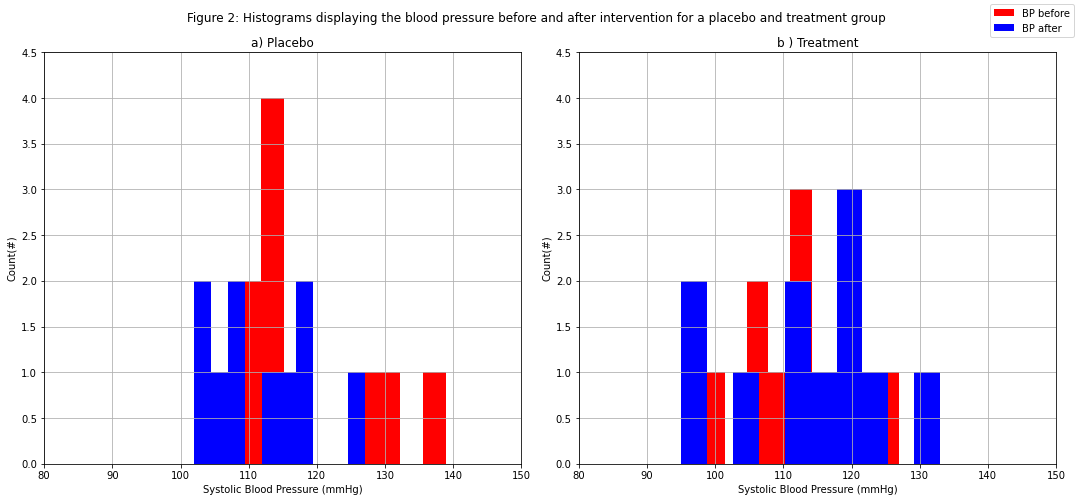

In [478]:
# Stacked Histogram with Placebo and Treatment groups on same plot
rows, cols = 1, 2
fig, ax = plt.subplots(rows, cols,figsize=(15, 7))
bins_size =10
group_name = ['a) Placebo', 'b ) Treatment']

# Plotting the histograms 
for col in range(cols):
    ax[col].hist(data[data['Group'] == group[col]]['BP before'], color=color_val[0],bins =bins_size)
    ax[col].hist(data[data['Group'] == group[col]]['BP after'], color =color_val[1], bins=bins_size)
    ax[col].set_title(group_name[col])
    ax[col].set_ylabel("Count(#)")
    ax[col].set_xlabel("Systolic Blood Pressure (mmHg)")
    ax[col].set_xlim([80,150])
    ax[col].set_ylim([0,4.5])
    ax[col].grid()

# Labelling the Histograms 
fig.suptitle('Figure 2: Histograms displaying the blood pressure before and after intervention for a placebo and treatment group' )
fig.legend(['BP before', 'BP after'])
fig.tight_layout()


Text(0.5, 1.04, 'Figure 3: Histograms displaying the blood pressure before and after intervention for a placebo and treatment group')

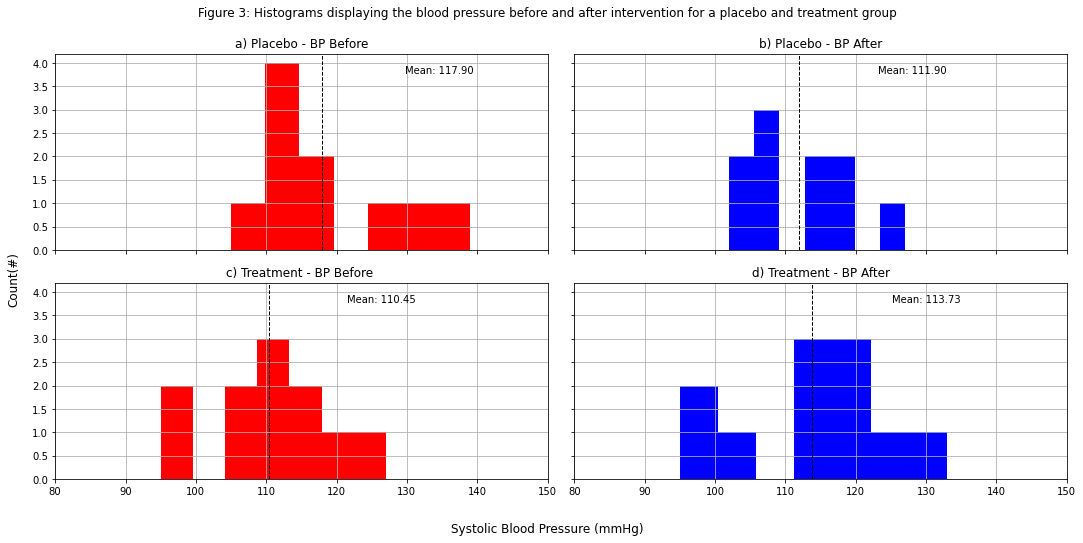

In [477]:
# Plotting individual histograms to better represent the shape and trend 
rows, cols = 2, 2
fig, ax = plt.subplots(rows, cols,figsize=(15,7), sharex=True, sharey=True)

titles=['a) Placebo - BP Before','b) Placebo - BP After', 'c) Treatment - BP Before ', 'd) Treatment - BP After']
bin_size =7

# Plots for the individual histograms 
x=0
for row in range(rows):
    for col in range(cols):
        ax[row,col].hist(data[data['Group'] == group[row]][names[col]], color=color_val[col], bins=bin_size)
        ax[row,col].axvline(data[data['Group'] == group[row]][names[col]].mean(), color='k', linestyle='dashed', linewidth=1)
        min_ylim, max_ylim = plt.ylim()
        ax[row,col].text(data[data['Group'] == group[row]][names[col]].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data[data['Group'] == group[row]][names[col]].mean()))
        ax[row,col].set_title(titles[x])
        ax[row,col].set_xlim([80,150])
        ax[row,col].grid()
        x=x+1

# Labelling the plots for the individual histograms 
fig.supylabel('Count(#)', x = 0)
fig.supxlabel('Systolic Blood Pressure (mmHg)', y =-0.01,)
fig.tight_layout()
fig.suptitle('Figure 3: Histograms displaying the blood pressure before and after intervention for a placebo and treatment group', y=1.04)
        

In [461]:
# Determining the actual data skew for each of the originally given variables 
print('Skew for Placebo BP before',data[data['Group'] == 'Placebo']['BP before'].skew())
print('Skew for Placebo BP after',data[data['Group'] == 'Placebo']['BP after'].skew())
print('Skew for Treatment BP before',data[data['Group'] == 'Treatment']['BP before'].skew())
print('Skew for Treatment BP after',data[data['Group'] == 'Treatment']['BP after'].skew())

Skew for Placebo BP before 1.0226422223674914
Skew for Placebo BP after 0.5966928981490767
Skew for Treatment BP before 0.047992848786790485
Skew for Treatment BP after -0.25694015851660523


Text(-0.01, 0.5, 'Count(#)')

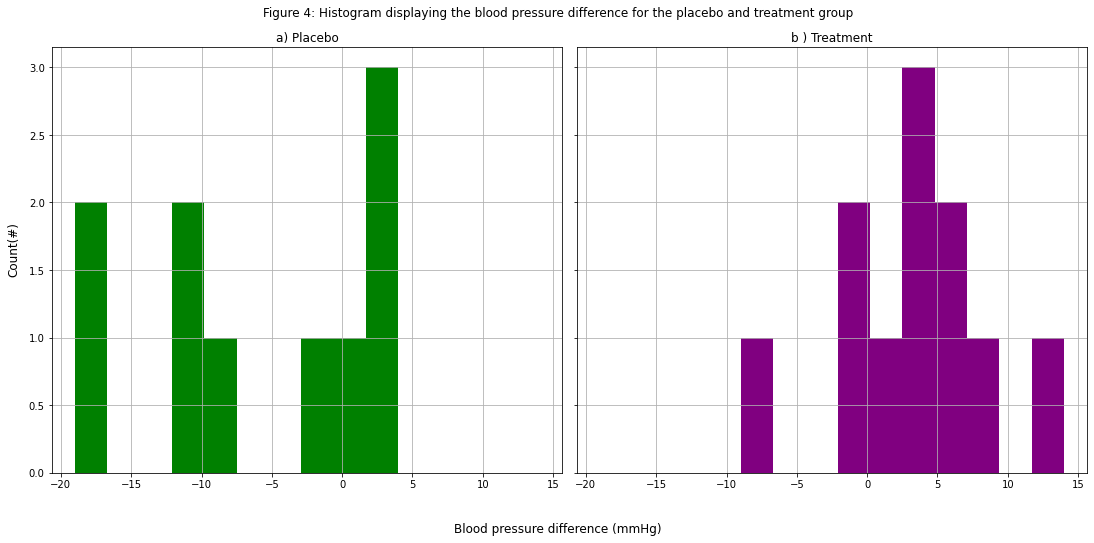

In [462]:
# Plotting the BP differences to compare the shape of the data
data['BP diff']= data['BP after'] - data['BP before']
# Setting up the figure variables 
bin_size= 8
rows, cols = 1,2
fig, ax = plt.subplots(rows, cols,figsize=(15,7), sharex=True, sharey=True)
color_val_diff=['green', 'purple']

#Plotting the actual data
for col in range(cols):
    ax[col].hist(data[data['Group'] == group[col]]['BP diff'], color=color_val_diff[col],bins =bins_size)
    ax[col].set_title(group_name[col])
    ax[col].grid()

# Labelling the figure
fig.suptitle('Figure 4: Histogram displaying the blood pressure difference for the placebo and treatment group' )
fig.tight_layout()
fig.supxlabel('Blood pressure difference (mmHg)', y=-0.07)
fig.supylabel('Count(#)', x =-0.01)

In [463]:
#Determining the skew for the BP differences between the placebo and treatment groups
print('Skew for Treatment BP diff',data[data['Group'] == 'Placebo']['BP diff'].skew())
print('Skew for Treatment BP diff',data[data['Group'] == 'Treatment']['BP diff'].skew())

Skew for Treatment BP diff -0.3378851862656457
Skew for Treatment BP diff -0.3926903522590896


### Analysis of the Provided Data: From Figures 

From Figure 1, it is seen that the placebo group's BP prior to the intervention has a larger spread than the BP after from the greater size of the box in the box and whisker plot and the greater length of the whiskers. This is confirmed when calculating the IQR and range - with the Placebo group before the intervention having an IQR of 12.5 mmHg and a range of 34 mmHg. Yet, the IQR for BP after the placebo intervention decreases to 10.5 mmHg and the range decreases to 25 mmHg. This spread decrease is further illustrated in both Figure 2a and Figure 3 whereby the histograms for the Placebo group, clearly show that the BP data before the intervention has a much greater spread around the mean of 117.9 mmHg with a positive skew (Figure 3a). This positive skew is confirmed through the skew calculation which gives a value of 1.02. Since a perfectly symmetrical distribution has a skew of 0 and nearly symmetrical distributions can be taken as having a skew of -0.5 to 0.5, this distribution is clearly positively skewed. The BP data after the intervention for the Placebo group has a mean of 111.9 mmHg (Figure 3b) and a skew value of 0.59, corresponding to only a slight positive skew. Thus, after the intervention, the degree of the positive skew decreases. In both Figure 3a and 3b, the BP data before and after the placebo intervention has a unimodal distribution.  

From Figure 1, for the treatment group, the opposite is true. The BP before the treatment has a lower spread as illustrated by the smaller size of the box in the box and whisker plot and the shorter whiskers than that of the box and whisker plot for the BP after the treatment is provided. This is once more confirmed when calculating the IQR and range. Before the treatment is provided, the BP before has an IQR of 8.5 mmHg and a range of 32 mmHg. The BP after treatment has an IQR of 11.5 mmHg and a range of 38 mmHg. This increase in the spread of BP data after the treatment is seen in the histograms of Figures 2b and 3. The histograms for the BP before treatment have a roughly symmetrical shape, centred around the mean of 110.45 mmHg in Figure 3c. This is confirmed by the very near 0 skew value of 0.047. Yet after the treatment is provided the BP has a larger spread around the 113.73 mmHg mean, with a slight negative skew as displayed in Figure 3d and through the negative calculated skew value of -0.257. However, since this skew is within the [-0.5; 0.5] range, the BP distribution after can be taken as being nearly symmetrical. In both Figure 3c and Figure 3d, the BP data before and after the treatment intervention has a distribution which is unimodal. 

Lastly, from Figure 4, it is clear that both the BP difference in the placebo and treatment groups have a slightly negative skew which is confirmed by their -0.34 and -0.39 skews respectively. However, since they are within the [-0.5; 0.5] range, they can be taken as nearly symmetrical. The BP difference for both groups has a unimodal distribution. 

## Section 2: Statistical Summary(20 marks):
In  this  section  the  students  must  use  both  descriptive  statistics  and  inferential  statistics  to produce  a  figure (or figures) clearly representing  the comparison  of data  and  any  statistical significance  between  groups.  This  plot  (or  plots)  should  clearly  show  appropriate  descriptive statistics  for  the  groups  as  well  as  any  significant  differences  demonstrated  by  inferential analysis. In addition to the figure/s, students must write a paragraph summarizing how the data looks from a statistical standpoint as well as providing a clear justification of any statistics used (i.e. ANOVA vs. independent/dependent t-test, mean vs. median, standard deviation vs. standard error). (10marks for figures, 10marks for paragraph)

### Section 2a: Descriptive Statistics


Text(0.5, 1.0, 'Figure 5: Mean Blood pressure before and after Placebo or Treatment')

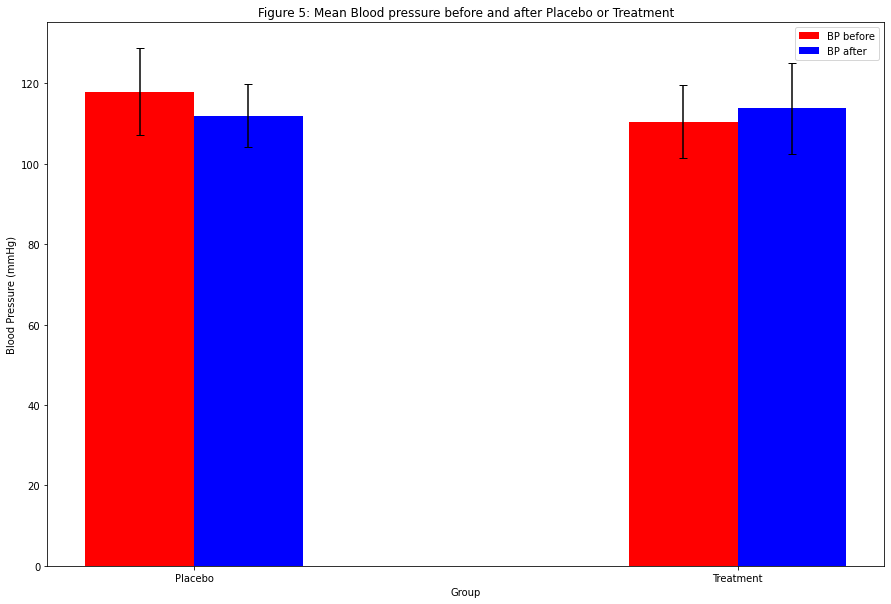

In [464]:
# Set up for plotting the bar graph with the means and standard deviations 
mean_b = np.zeros(2)
mean_a = np.zeros(2)
std_b = np.zeros(2)
std_a = np.zeros(2)

# Populating the empty arrays with the correct values 
for i in range(2):
    mean_b[i]=data[data['Group'] == group[i]]['BP before'].mean()
    mean_a[i]=data[data['Group'] == group[i]]['BP after'].mean()
    # Set ddof =1 to ensure that the divisor in the standard deviation calcualtion is N - 1, 
    # which provides an unbiased measure of the standard deviation for sample populations.
    std_b[i]=data[data['Group'] == group[i]]['BP before'].std(ddof=1)
    std_a[i]=data[data['Group'] == group[i]]['BP after'].std(ddof=1)

# Labelling the barplot
plt.figure(figsize = (15,10))
plt.bar([1,2],mean_b, yerr = std_b, width = 0.2, align = "center", color='red',capsize =4)
plt.bar([1.2,2.2],mean_a, yerr = std_a, width = 0.2, align = "center", color = "blue",capsize =4)
plt.xticks([1.1,2.1],group)
plt.xlabel('Group')
plt.ylabel('Mean Blood Pressure (mmHg)')
plt.legend(['BP before','BP after'])
plt.title('Figure 5: Mean Blood pressure before and after Placebo or Treatment')


In [465]:
# Generating a Summary Table with a collection of descriptive statistics for the BP before and after the Placebo and Treatment Groups
from tabulate import tabulate

#Populating the table
column_headings =['Statistic','Placebo - BP Before','Placebo - BP After', 'Treatment - BP Before ', 'Treatment - BP After']
table = [column_headings, 
         ['Mean', mean_b[0],mean_a[0], mean_b[1], mean_a[1]], 
         ['Median',data[data['Group'] == 'Placebo']['BP before'].median(),data[data['Group'] == 'Placebo']['BP after'].median() ,
         data[data['Group'] == 'Treatment']['BP before'].median() ,data[data['Group'] == 'Treatment']['BP after'].median() ], 
         ['Standard Deviation',std_b[0],std_a[0], std_b[1], std_a[1] ],
         ['Minimum Value',data[data['Group'] == 'Placebo']['BP before'].min(),data[data['Group'] == 'Placebo']['BP after'].min() ,
         data[data['Group'] == 'Treatment']['BP before'].min() ,data[data['Group'] == 'Treatment']['BP after'].min()],
         ['Q1',data[data['Group'] == 'Placebo']['BP before'].quantile(0.25),data[data['Group'] == 'Placebo']['BP after'].quantile(0.25) ,
         data[data['Group'] == 'Treatment']['BP before'].quantile(0.25) ,data[data['Group'] == 'Treatment']['BP after'].quantile(0.25)],
         ['Q3',data[data['Group'] == 'Placebo']['BP before'].quantile(0.75),data[data['Group'] == 'Placebo']['BP after'].quantile(0.75) ,
         data[data['Group'] == 'Treatment']['BP before'].quantile(0.75) ,data[data['Group'] == 'Treatment']['BP after'].quantile(0.75)],
         ['Maximum Value',data[data['Group'] == 'Placebo']['BP before'].max(),data[data['Group'] == 'Placebo']['BP after'].max() ,
         data[data['Group'] == 'Treatment']['BP before'].max() ,data[data['Group'] == 'Treatment']['BP after'].max()]
         ]

#Printing the table
print('Table 1: A summary of descriptive statistics for the BP before and after intervention for the placebo and treatment')
print(tabulate(table))


Table 1: A summary of descriptive statistics for the BP before and after intervention for the placebo and treatment
------------------  -------------------  ------------------  ---------------------  --------------------
Statistic           Placebo - BP Before  Placebo - BP After  Treatment - BP Before  Treatment - BP After
Mean                117.9                111.9               110.45454545454545     113.72727272727273
Median              114.5                111.0               111.0                  114.0
Standard Deviation  10.836666154003884   7.79529772790409    9.01513878277685       11.340995627288716
Minimum Value       105                  102                 95                     95
Q1                  110.75               106.25              106.5                  108.5
Q3                  123.25               116.75              115.0                  120.0
Maximum Value       139                  127                 127                    133
------------------  ---

In [466]:
# Calulating the standard error for pairwise data
SE_placebo = data[data['Group'] == 'Placebo']['BP diff'].std(ddof =1)/np.sqrt(data[data['Group'] == 'Placebo']['BP diff'].shape)
SE_treatment  =  data[data['Group'] == 'Treatment']['BP diff'].std(ddof =1)/np.sqrt(data[data['Group'] == 'Treatment']['BP diff'].shape)
print('The standard error for the placebo group: ',float(SE_placebo), 'mmHg')
print('The standard error for the treatment group: ',float(SE_treatment), 'mmHg')

The standard error for the placebo group:  2.7648588471103626 mmHg
The standard error for the treatment group:  1.7791259809800843 mmHg


Text(0.5, 1.0, 'Figure 6: Mean Blood pressure difference for Placebo or Treatment Group')

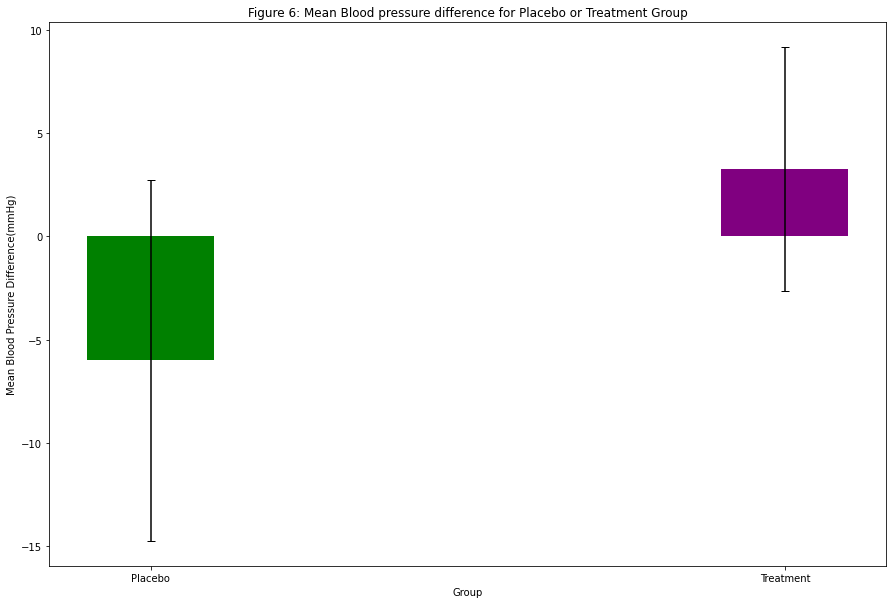

In [480]:
# Set up for plotting the bar graph with the means and standard deviations - BP differences
plt.figure(figsize = (15,10))
# Set ddof =1 to ensure that the divisor in the standard deviation calcualtion is N - 1, 
# which provides an unbiased measure of the standard deviation for sample populations.
plt.bar([1],data[data['Group'] == 'Placebo']['BP diff'].mean(), yerr = data[data['Group'] == 'Placebo']['BP diff'].std(ddof=1), width = 0.2, align = "center", color=color_val_diff[0],capsize =4)
plt.bar([2],data[data['Group'] == 'Treatment']['BP diff'].mean(), yerr = data[data['Group'] == 'Treatment']['BP diff'].std(ddof=1), width = 0.2, align = "center", color =color_val_diff[1],capsize =4)
plt.xticks([1,2],group)
plt.xlabel('Group')
plt.ylabel('Mean Blood Pressure Difference(mmHg)')
plt.title('Figure 6: Mean Blood pressure difference for Placebo or Treatment Group')

In [468]:
#Populating the summary descriptive statistic table 
column_headings =['Statistic','Placebo - BP diff', 'Treatment - BP diff']
table = [column_headings, 
         ['Mean', data[data['Group'] == 'Placebo']['BP diff'].mean(),data[data['Group'] == 'Treatment']['BP diff'].mean()], 
         ['Median',data[data['Group'] == 'Placebo']['BP diff'].median(),data[data['Group'] == 'Treatment']['BP diff'].median() ], 
         ['Standard Deviation',data[data['Group'] == 'Placebo']['BP diff'].std(ddof=1),data[data['Group'] == 'Treatment']['BP diff'].std(ddof=1) ],
         ['Minimum Value',data[data['Group'] == 'Placebo']['BP diff'].min(),data[data['Group'] == 'Treatment']['BP diff'].min()],
         ['Q1',data[data['Group'] == 'Placebo']['BP diff'].quantile(0.25),data[data['Group'] == 'Treatment']['BP diff'].quantile(0.25)],
         ['Q3',data[data['Group'] == 'Placebo']['BP diff'].quantile(0.75),data[data['Group'] == 'Treatment']['BP diff'].quantile(0.75)],
         ['Maximum Value',data[data['Group'] == 'Placebo']['BP diff'].max(),data[data['Group'] == 'Treatment']['BP diff'].max()]
         ]

#Printing the table
print('Table 2: A summary of descriptive statistics for the BP difference for the placebo and treatment group')
print(tabulate(table))

Table 2: A summary of descriptive statistics for the BP difference for the placebo and treatment group
------------------  -----------------  -------------------
Statistic           Placebo - BP diff  Treatment - BP diff
Mean                -6.0               3.272727272727273
Median              -5.0               4.0
Standard Deviation  8.743251365736     5.900693333683917
Minimum Value       -19                -9
Q1                  -11.75             0.5
Q3                  1.75               6.0
Maximum Value       4                  14
------------------  -----------------  -------------------


#### Descriptive Statistics Analysis 

For the descriptive statistic analysis of the BP before and after the placebo and treatment, Figure 5 and Table 1 for the groups will be used. In determining the statistics to discuss, the mean and median are calculated as measures of central tendency. However, for a perfectly symmetrical distribution, the mean and median are equal. Despite the positive skew in the BP before and after data in the placebo group, all data across both the placebo and treatment groups are included within 3 standard deviations (as demonstrated below), thus there are no outliers based on this definition. Thus, the mean would be a more comprehensive choice of central tendency as it encompasses all the data points in the subset without possible distortion from outliers. In determining the best representation for the spread of the data either the standard deviation, the interquartile range (IQR) or the range can be used. The range is a simplistic measure of spread that only gives the outer extremes of the dataset and is thus inappropriate for this data. The IQR is a better measure of the spread than the range, especially where there are outliers present since it captures the spread within the middle 50% of the data. However, in the case where there are no outliers and the dataset is fairly symmetrical, the standard deviation is the better measurement. Thus the standard deviation is the best statistic for this analysis. 

From Table 1 and Figure 5, The Placebo group's BP before the intervention has a mean value of 117.9 mmHg with a standard deviation of 10.8 mmHg. Following the intervention, the blood pressure values for the placebo group have a mean of 111.9 mmHg and a standard deviation of 7.8 mmHg - indicating that the distribution's centre has shifted leftward and has a smaller spread about the mean. Since the data spread before the mean had a positive skew, the leftward shift of the mean together with the decreased spread has resulted in a decrease in the positive skew. Due to this decreased spread, and lower standard deviation in the BP after intervention in the placebo group, the mean and median of 111.9mmHg and 111.0mmHg differ only by 0.9mmHg - illustrating that the data set is nearer to being symmetrical whereby the mean and median are the same value. Additionally, the interval for 3 standard deviations is from [85.5 mmHg; 150.3 mmHg] and [88.5 mmHg; 135.3 mmHg] for the placebo group's BP before and BP after respectively. Thus, the minimum and maximum values of both BP before ([105mmHg; 139 mmHg]) and after ([102mmHg; 127 mmHg]) in the placebo group fit within 3 standard deviations, meaning that there are no outliers based on the 3 standard deviation definition. 

From Table 1 and Figure 5, the treatment group before the intervention has a mean value of 110.45 mmHg with a standard deviation of 9.02 mmHg. Following the intervention, the blood pressure values for the treatment group have a mean of 113.73 mmHg and a standard deviation of 11.34 mmHg - indicating that the distribution's centre has shifted rightward and has a larger spread about the mean. Since the data spread before the mean had a very near symmetrical distribution, the rightward shift of the mean together with the increased spread has resulted in a slight negative skew. Furthermore, the interval for 3 standard deviations is from [83.39 mmHg; 137.51 mmHg] and [79.71 mmHg; 147.75 mmHg] for the treatment group's BP before and BP after respectively. Thus, the minimum and maximum values of both BP before ([95 mmHg; 127 mmHg]) and after ([95 mmHg; 133 mmHg]) in the treatment group fit within 3 standard deviations, meaning that there are no outliers based on the 3 standard deviation definition.

For the descriptive statistics for the BP difference between the placebo and treatment groups, Figure 6, Table 2  and the standard error are used with the same arguments for using the mean and standard deviation as before due to both distributions having near symmetrical skew ( being within the [-0.5; 0.5] range for skew) and all data points being within 3 standard deviations from the mean. The placebo group's mean difference is -6 mmHg with a standard deviation of 8.74 mmHg. This illustrates that the BP after was, on average, smaller than the BP before in the placebo group as demonstrated in the larger mean value of the BP before in the placebo group over the BP after in Table 1. The mean value for the Treatment BP diff is 3.27 mmHg with a standard deviation of 5.9 mmHg, illustrating that the BP after had a larger value, on average, than the BP before ( which was once more seen in the above analysis and in Table 1). Thus the treatment group has a smaller standard deviation about its mean, illustrating a more concentrated dataset than that of the placebo BP difference. The actual statistical significance of these differences will be explored below. 

Lastly, the standard error of the mean has been calculated for the paired datasets for BP difference. For the placebo group, the standard error is 2.76 mmHg whereas the standard error for the treatment group is 1.78 mmHg. Since a smaller standard error of the mean indicates that the sample is a better representation of the population - the treatment group with its smaller standard error is slightly better at representing the population. However, since the sample size is so small (less than 30 samples in each group) and there is only one trial, this is not a very reliable indicator. This will be explored further in section 3. 


### Section 2b: Inferential Statistics for Pairwise Data

Text(0.5, 1.04, 'Figure 7: Q-Q Plots of the Placebo and Treatment Groups before and after intervention')

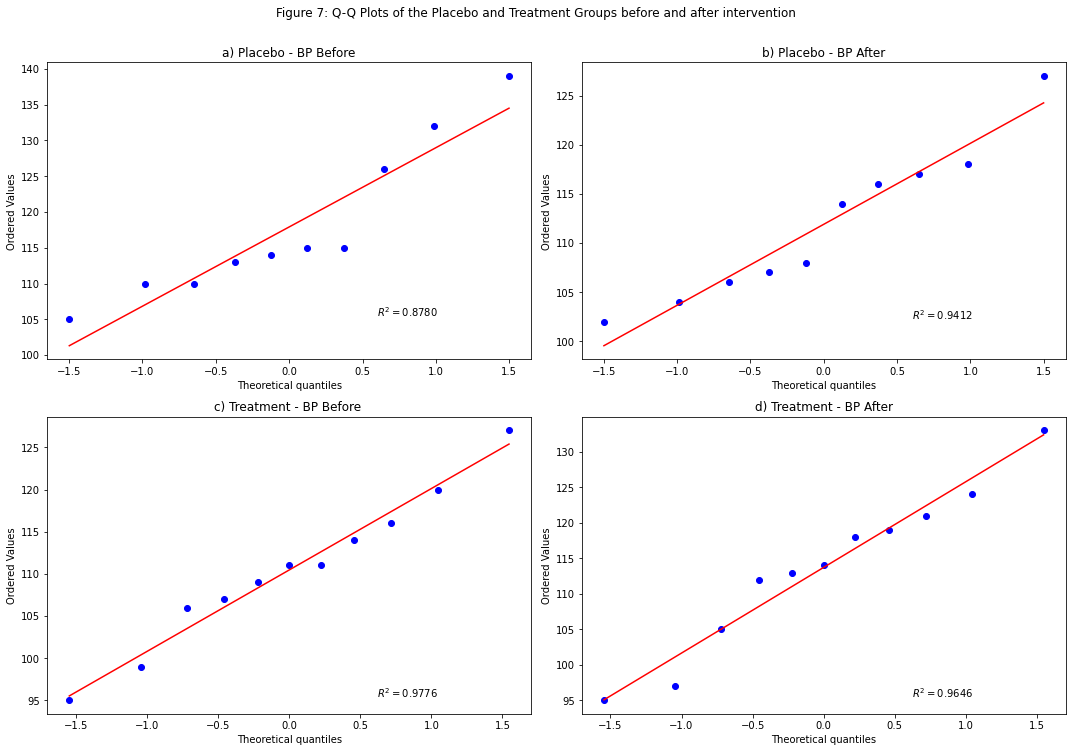

In [482]:
# Q-Q Plots for the different pairwise datasets to check normality

#Setting up the figures 
rows, cols = 2, 2
fig, ax = plt.subplots(rows, cols,figsize=(15,10))

# Plotting the figures
x=0
for row in range(rows):
    for col in range(cols):
        stats.probplot(list(data[data['Group'] == group[row]][names[col]]), plot=ax[row,col],rvalue=True)
        ax[row,col].set_title(titles[x] )
        x=x+1

# Labelling the figures
fig.tight_layout()
fig.suptitle('Figure 7: Q-Q Plots of the BP before and after intervention for the placebo and treatment groups', y=1.04)
        

In [483]:
# Defining the alpha level for the inferential statistics section 
alpha =0.05

#Normality testing 
print('Normality Testing; shapiro test')
for row in range(rows):
    for col in range(cols):
         stat,pval =stats.shapiro(data[data['Group'] == group[row]][names[col]])
         if pval> alpha:
            print('value is normal, p-val:',pval)


# Variance Testing 
print()
print("Varainace Testing")
print(stats.levene(data[data['Group'] == 'Placebo']['BP before'],data[data['Group'] == 'Placebo']['BP after'],
data[data['Group'] == 'Treatment']['BP before'],data[data['Group'] == 'Treatment']['BP after']))



Normality Testing; shapiro test
value is normal, p-val: 0.12309812754392624
value is normal, p-val: 0.5333365797996521
value is normal, p-val: 0.9856303334236145
value is normal, p-val: 0.8122851252555847

Varainace Testing
LeveneResult(statistic=0.2206719508565795, pvalue=0.8814398815110721)


In [471]:
# t-testing with ttest_rel
t_statrel,p_rel =stats.ttest_rel(data[data['Group'] == 'Placebo']['BP before'],
              data[data['Group'] == 'Placebo']['BP after'])

print('Placebo results with related t-test:',p_rel)

t_stat2rel,p2_rel =stats.ttest_rel(data[data['Group'] == 'Treatment']['BP before'],
              data[data['Group'] == 'Treatment']['BP after'])

print('Treatment results with related t-test:',p2_rel)


# t-testing with wilcoxon
t_stat,p =stats.wilcoxon(data[data['Group'] == 'Placebo']['BP before'],
              data[data['Group'] == 'Placebo']['BP after'])

print('Placebo results with wilcoxon:',p)

t_stat2,p2 =stats.wilcoxon(data[data['Group'] == 'Treatment']['BP before'],
              data[data['Group'] == 'Treatment']['BP after'])

print('Treatment results with wilcoxon:',p2)

Placebo results with related t-test: 0.05810471179643279
Treatment results with related t-test: 0.09567470297925995
Placebo results with wilcoxon: 0.16015625
Treatment results with wilcoxon: 0.09154126548897694


c:\Users\tali9\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Section 2b: Inferential Statistics between the BP differences in the Placebo and Treatment Groups

Text(0.5, 1.04, 'Figure 8: Q-Q Plots of the Placebo and Treatment Groups before and after intervention')

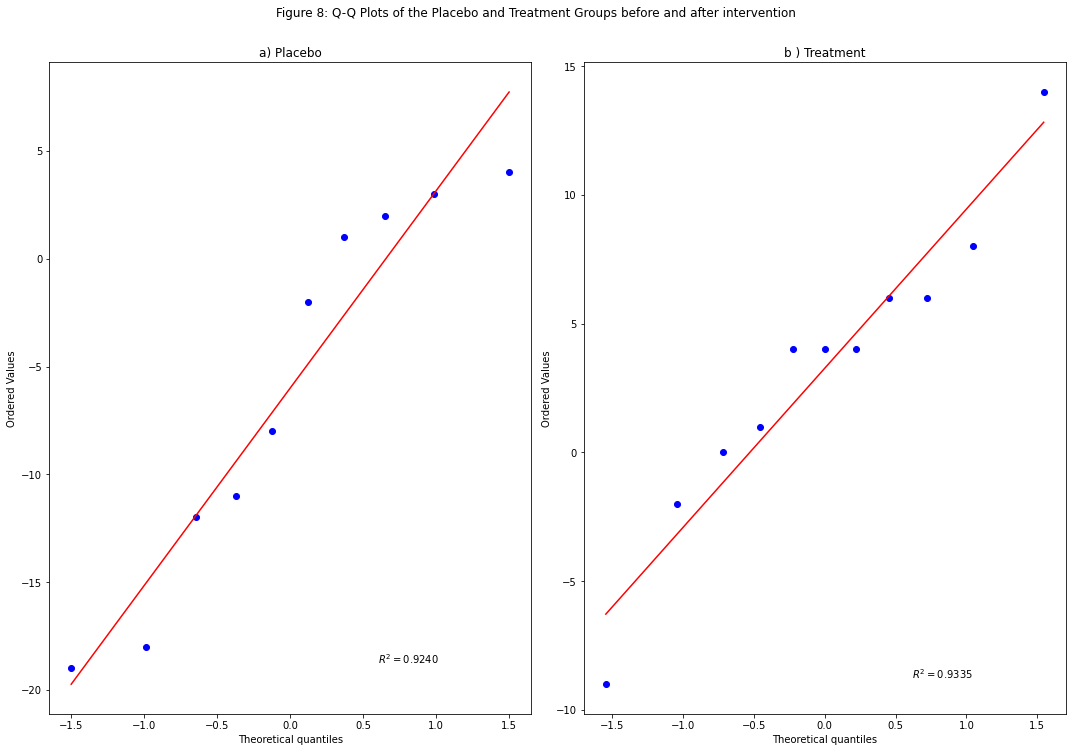

In [484]:
# Q-Q plots for the BP differences for normality checkign
rows, cols = 1, 2
fig, ax = plt.subplots(rows, cols,figsize=(15,10))

# Plotting the figures
x=0
for col in range(cols):
    stats.probplot(list(data[data['Group'] == group[col]]['BP diff']), plot=ax[col],rvalue=True)
    ax[col].set_title(group_name[x] )
    x=x+1

# Labelling the figures
fig.tight_layout()
fig.suptitle('Figure 8: Q-Q Plots of the BP differences for the placebo and treatment groups', y=1.04)
        

In [473]:
# Defining the alpha level for the inferential statistics section 
alpha =0.05

#Normality testing 
print('Normality Testing; shapiro test')
for col in range(cols):
        stat,pval =stats.shapiro(data[data['Group'] == group[col]]['BP diff'])
        if pval> alpha:
            print('value is normal, p-val:',pval)


# Variance Testing 
print()
print("Varainace Testing")
print(stats.levene(data[data['Group'] == 'Placebo']['BP diff'],data[data['Group'] == 'Treatment']['BP diff']))

Normality Testing; shapiro test
value is normal, p-val: 0.19441504776477814
value is normal, p-val: 0.7525107264518738

Varainace Testing
LeveneResult(statistic=4.322481807736499, pvalue=0.051398588009207095)


In [485]:
# t-testing with Welch t-test 
t_statind,p_ind =stats.ttest_ind(data[data['Group'] == 'Placebo']['BP diff'],
              data[data['Group'] == 'Treatment']['BP diff'],equal_var = False)

print('Welch t-test p-value:',p_ind)


Welch t-test p-value: 0.01255053818784677


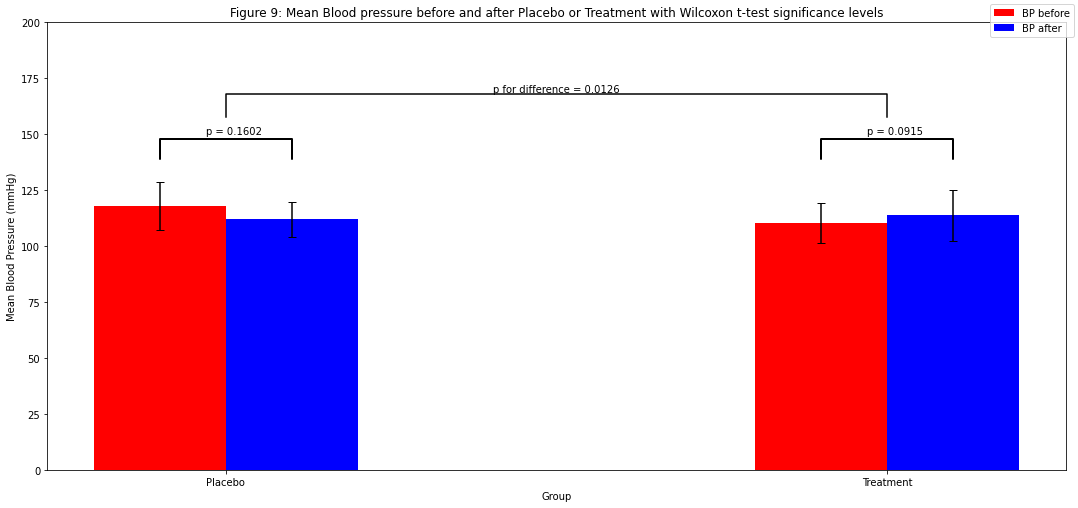

In [479]:
# Replotting the barplot with the significant differences represented 
rows, cols = 1, 1
fig, ax = plt.subplots(rows, cols,figsize=(15, 7))
ax.bar([1,2],mean_b, yerr = std_b, width = 0.2, align = "center", color='red',capsize =4)
ax.bar([1.2,2.2],mean_a, yerr = std_a, width = 0.2, align = "center", color = "blue",capsize =4)
ax.set_xticks([1.1,2.1],group)
ax.set_xlabel('Group')
ax.set_ylabel('Mean Blood Pressure (mmHg)')
ax.set_ylim([0,200])
fig.legend(['BP before', 'BP after'])
fig.tight_layout()
ax.set_title('Figure 9: Mean Blood pressure before and after Placebo or Treatment with Wilcoxon t-test significance levels')

# Adapted from Hooked, ‘Answer to “Indicating the statistically significant difference in bar graph”’, 
# Stack Overflow, Jul. 18, 2012. https://stackoverflow.com/a/11543637 (accessed Dec. 12, 2022).
def sig_between(i,j,text,pos):
    x = (pos[i]+pos[j])/2
    y = 130
    dx = abs(pos[i]-pos[j])
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(pos[i]+0.07,y+20), zorder=10)
    ax.annotate('', xy=(pos[i],y), xytext=(pos[j],y), arrowprops=props)


# Adapted from cheersmate, ‘Answer to “Indicating the statistically significant difference in bar graph”’,
#  Stack Overflow, Sep. 14, 2018. https://stackoverflow.com/a/52333561 (accessed Dec. 12, 2022).
def sig_diff(val1, val2, text, center, bar_y, dh=.05, barh=.05):
    lx, ly = center[val1]+0.1,  bar_y[val1]+30
    rx, ry = center[val2]+0.1,  bar_y[val2]+30

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    
    plt.text(*mid, text, **kwargs)


# Plotting the significance levels on the bar plot
text = 'p = ' + str(round(p,4))
text2 =  'p = ' + str(round(p2,4))
text3 =  'p for difference = ' + str(round(p_ind,4))
sig_between(0,1,text,(1,1.2,2,2.2))
sig_between(2,3,text2,(1,1.2,2,2.2))
sig_diff(1, 2,text3 ,  np.arange(4)  , [mean_a[0],mean_a[1],mean_b[0], mean_b[1]])




**Section 2b: Inferential Statistics for Pairwise Data**

Ultimately, since the dataset provided is paired and not independent, a basic one-way ANOVA is not appropriate. However, had there been BP measures taken at more than 2-time points for each person in the different groups, a repeated measures ANOVA could have been utilised. However, testing the data for both normality and uniform variance is still necessary to determine the type of paired t-test to utilise. 

In Figure 7, the Q-Q plots have been plotted for the BP datasets before and after intervention for both the placebo and the treatment groups. All Figures plotted are fairly linear which is an indicator of normality, with the highest r value being 0.9776 in Figure 5c. However, a better method to check the normality of the data is to utilise a statistical test such as the Shapiro-Wilke test. The p-values coming from this analysis are represented below: 

- Placebo - BP before: p_value = 0.123
- Placebo - BP after: p_value = 0.533
- Treatment - BP before: p_value = 0.986
- Treatment - BP after: p_value = 0.812

All p-values are greater than the chosen alpha level of 0.05, thus we cannot reject the null hypothesis that the data is not normally distributed. 

To check that the data has a uniform variance, a Levene test is performed which gives a p-value of 0.88 which is greater than the chosen alpha value of 0.05. Thus, we fail to reject the null hypothesis that the data is not uniformly distributed. This normality and uniform variance confirmation enable the use of the standard-related t-test which gives the following results:

- Placebo results with related t-test: p_value = 0.0581
- Treatment results with related t-test: p_value = 0.0957

Since the alpha level chosen is 0.05, the p-value for the placebo is greater than this 0.05 alpha level, thus enabling us to retain our null hypothesis that there is no significant difference between the BP before and after the placebo intervention. Additionally, the p-value for the treatment is greater than the 0.05 alpha level, thus enabling us to retain our null hypothesis that there is no significant difference between the BP before and after the treatment.

However, since the sample size for the placebo group is N = 10 and the sample size for the treatment group is N = 11, it can be argued that the results produced from the Shapiro-Wilke and Levene tests are invalid because there are simply too few samples for a true indication of normality or variance uniformity to be obtained. Thus, the non-parametric Wilcoxon test is also performed.

- Placebo results with Wilcoxon: p_value = 0.1602
- Treatment results with Wilcoxon: p_value = 0.0915

Once more, since both p values for the placebo and treatment groups are above the chosen alpha level of 0.05, we retain the null hypothesis that the BP before and BP after in both the placebo and treatment groups are not significantly different. However, the major change between the related t-test and the Wilcoxon t-test is the distance of the p-value in the placebo group away from the chosen alpha value. In the ttest_rel result, the p-value is only 0.081 away from the chosen 0.05 alpha level. while with the Wilcoxon test, the p-value is 0.11 away from the alpha level. Thus, the Wilcoxon test gives a much less borderline result to retain the null hypothesis. 

**Section 2b: Inferential Statistics between the BP differences in the Placebo and Treatment Groups**

Despite the BP differences being independent, since there are only 2 groups being compared, an ANOVA is unnecessary. To determine which t-test to use, the normality and variance of the data are needed to be tested. 

In Figure 8, the Q-Q plots for both the BP difference for the placebo and treatment groups are plotted. Both figures are fairly linear with an r-value of 0.9240 in Figure 8a and 0.9335 in Figure 8b for the placebo and treatment groups respectively. This result is further confirmed through a Shapiro-Wilke Test : 

- Placebo - BP difference: p_value = 0.1944
- Treatment - BP difference: p_value = 0.7525

Both p-values are greater than the chosen alpha level of 0.05, thus the null hypothesis that the data is not normally distributed cannot be rejected. 

To check that the data has a uniform variance, a Levene test is performed which gives a p-value of 0.051 which is only just greater than the chosen p-value of 0.05. Generally, if the value is greater than the p-value the null hypothesis that the data is not uniformly distributed would be failed to be rejected. However, due to how close the p-value is to the chosen alpha value of 0.05, we will use a Welch t-test over the standard independent t-test which assumes uniform variance. If the result comes up as being significant, it strengthens the claim that the values are indeed significant. 

- Placebo vs Treatment BP difference with Welch P-value: p_value = 0.01255

Since the alpha level we have chosen is 0.05, the p-value for the BP diff between the placebo and treatment group is less than the 0.05 alpha level, thus enabling us to reject our null hypothesis that there is no significant difference between the two groups. 


## Section 3: Discussion of results (15 marks):
In this section students must write a discussion (1 page maximum) summarizing the findings of the data analysis as a whole. The need to clearly describe the relationships that can be inferred from the statistical analysis and the importance of these findings relative to the initial aim of the study (the aim or objective will be noted in the specific data file allotted to each student). The students must also comment on the experimental design challenges or issues they can identify from the data analysis, and how to improve the study/analysis of the study. Specific statements on study design related to aims, powering and the level of significance should be included. Finally, specify an experimental approach including variables, sample numbers and powering that would enable a superior study to address your stated aim. (5 marks for summary, 5 marks for comment on study design and 5 marks for proposed new design)

### Summary
The overall aim of this experiment is to determine the impact of magnese supplements on systolic blood pressure.  Despite, the BP after the placebo having a lower average and standard deviation than the BP before, the Wilcoxon t-test produced a p-value greater than the alpha value of 0.05, thus, there is no significant difference - which is to be expected for a control. In the treatment group, the BP after the intervention has a higher mean and standard deviation than the BP before, however, the p-value of 0.09 is greater than the chosen alpha level thus, there is no significance in the difference between the BP before and after the treatment. Thus, either the magnese supplement treatment does not produce any effect on blood pressure or there are faults with the experimental design. Based on the literature, magnese supplements have been shown to decrease blood pressure - thus, it is evident that there are faults with the study design. In the Welch t-test for the BP difference between the control and treatment group, a p-value of 0.013 was obtained which is less than the chosen alpha value of 0.05. Thus, the differences between the two groups are statistically significant. Yet, since the pairwise comparisons yielded no significant statistical difference, the difference between the BP difference in the control and treatment groups is taken as an indication of the intergroup variability in the samples for the control and treatment groups. Thus, no further information is obtained about the relationship between the variables from this analysis. Subsequently, due to the poor study design, the study aim of determining the effect of magnese supplements on blood pressure remains unresolved as the statistical analysis did not produce any additional insight into the systolic blood pressure and the groups. This study has multiple issues. For each issue, a proposed change is suggested, with the assumption that time and resources are not limiting factors. Overall, the same variables of blood pressure, treatment of magnese supplements and control will be used.

### Study Design Criticism and Proposed New Design
The original aim of this study is to determine the impact of magnese supplements on systolic blood pressure, yet literature suggests that magnese supplements are found to decrease systolic blood pressure. Thus, a more specific aim can be formulated such as to determine whether magnese supplements decrease blood pressure which better states the expected relationship between the treatment and the effect on blood pressure. Additionally, this restated aim allows for better recruitment of study participants. Normal systolic blood pressure is less than 120 mmHg. In this study, only 30% of the control sample (n = 3) and 9% of the treatment sample (n =1) would be classed as having high or elevated blood pressure. Study participants with high blood pressure should have been selected to see the treatment effect. There is also a large inter-group variability between the control and the treatment group. By having better exclusion criteria for the study participants and increasing the sample size (as will be discussed below), the inter-group variability would decrease. Thus, an exclusion criterion for people having normal systolic blood pressure should have been in place. Additionally, it is advised to control for other confounding factors within the exclusion criteria such as: excluding people with chronic conditions which increase blood pressure and excluding people on other medications which could interfere with the effect of the magnese supplements. Controlling for age, gender and lifestyle could also assist in decreasing inter-group variability.

Doing a posthoc power analysis gave: 

- power for the blood pressure difference for control and treatment was 80.5% with mean difference = 9.27, s1= 8.74, n1 = 10, s2 = 5.9, n2 = 11 and alpha = 0.05 where s refers to standard deviation and n is the sample size using [an online posthoc power calculator](https://clincalc.com/stats/Power.aspx)
- power for the blood pressure before and after the control was 49.13% with a mean difference = 6, standard deviation difference = 8.74, n = 10 and alpha = 0.05 using [a post hoc power calculator for paired data](https://homepage.univie.ac.at/robin.ristl/samplesize.php?test=pairedttest)
- power for the blood pressure before and after the treatment was 38.3% with a mean difference = 3.27, standard deviation difference = 5.9, n =11 and alpha = 0.05 using the calculator as above.

Since clinical tests typically have a power of  80% to 95%, the power for the pairwise comparisons is too low. The analysis for this study also made use of an alpha level of significance set to 0.05. Despite this alpha value being used frequently in statistical analyses, an alpha value of 0.01 could be considered better for clinical studies as it incurs only a 1 % level of type 1 error. Since the power was lowest in the paired tests, these will be used to calculate a new sample size. Thus, to calculate the new sample size at an alpha level of 0.01 and a power of 90% looking just at the paired tests via [the online sample size calcualtor](https://homepage.univie.ac.at/robin.ristl/samplesize.php?test=pairedttest)for the same mean differences and standard deviations as above:

-   N = 29 people for the blood pressure comparison before and after the control  
-   N = 42 people for the blood pressure comparison before and after the treatment 

Thus, to keep a balanced sample across the control and treatment, 42 people for the treatment and 42 people for the control should be recruited. Realistically, by using the new exclusion criteria for the sample groups, the expected mean and standard deviation would change and thus, literature would be needed to calculate the mean and standard deviation expected to then estimate the sample size. 

Lastly, this experiment only has a single trial. This is problematic as it is harder to spot experimental errors in measurements. To ensure that the treatment effect can be reproduced and minimise the chances of other factors influencing the study, measurements should not just be made at two-time points but instead across multiple trials. This should not only be done within the initial group of study participants but also through going through multiple rounds of the study whereby new study participants are found. This will also help to decrease the standard error and ensure that the sample is more representative of the population. 

